### Description: Predicting Ethereum Price with Python and Machine Learning using Scikit-learn and Support Vector Regression

In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



In [2]:
# Load the dataset
df = pd.read_csv('ethereum_2015-08-07_2024-06-02.csv')
df['Date'] = pd.to_datetime(df['Start'])
df.set_index('Date', inplace=True)
display(df)

,Start,End,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,,,
2024-06-01,2024-06-01,2024-06-02,2948.742856,2978.306538,2941.392797,2971.467374,1.519628e+10,3.558701e+11
2024-05-31,2024-05-31,2024-06-01,2940.157084,2992.084249,2925.939443,2947.755919,1.673715e+10,3.544224e+11
2024-05-30,2024-05-30,2024-05-31,2953.729354,2981.526565,2913.709414,2940.947921,1.754862e+10,3.542934e+11
2024-05-29,2024-05-29,2024-05-30,3000.900270,3021.146455,2938.025184,2951.882733,1.889175e+10,3.575360e+11
2024-05-28,2024-05-28,2024-05-29,3028.869403,3045.442442,2962.778842,3000.077482,1.966750e+10,3.614046e+11
...,...,...,...,...,...,...,...,...
2015-08-12,2015-08-12,2015-08-13,0.838300,1.012639,0.693657,0.971606,1.547950e+06,5.246035e+07
2015-08-11,2015-08-11,2015-08-12,0.556151,0.888188,0.520658,0.830301,5.029142e+05,3.743174e+07
2015-08-10,2015-08-10,2015-08-11,0.551009,0.572956,0.499706,0.555567,3.593449e+05,3.283582e+07


In [3]:

# Prepare features and target
future_days = 10
df['Future_Close'] = df['Close'].shift(-future_days)
df.dropna(inplace=True)
display(df)

X = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']].values
y = df['Future_Close'].values

,Start,End,Open,High,Low,Close,Volume,Market Cap,Future_Close
Date,,,,,,,,,
2024-06-01,2024-06-01,2024-06-02,2948.742856,2978.306538,2941.392797,2971.467374,1.519628e+10,3.558701e+11,2936.321752
2024-05-31,2024-05-31,2024-06-01,2940.157084,2992.084249,2925.939443,2947.755919,1.673715e+10,3.544224e+11,2970.524163
2024-05-30,2024-05-30,2024-05-31,2953.729354,2981.526565,2913.709414,2940.947921,1.754862e+10,3.542934e+11,2869.336887
2024-05-29,2024-05-29,2024-05-30,3000.900270,3021.146455,2938.025184,2951.882733,1.889175e+10,3.575360e+11,2415.723011
2024-05-28,2024-05-28,2024-05-29,3028.869403,3045.442442,2962.778842,3000.077482,1.966750e+10,3.614046e+11,2452.934356
...,...,...,...,...,...,...,...,...,...
2015-08-22,2015-08-22,2015-08-23,1.095342,1.159023,1.061892,1.093426,1.285603e+06,8.092551e+07,0.971606
2015-08-21,2015-08-21,2015-08-22,1.150003,1.221833,1.061986,1.113947,2.009350e+06,8.581018e+07,0.830301
2015-08-20,2015-08-20,2015-08-21,0.988240,1.203683,0.979974,1.150419,1.424623e+06,7.662441e+07,0.555567


In [4]:
# Normalize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [5]:
# Define parameter grids for GridSearchCV
svr_param_grid_reduced = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear'],
    'gamma': [0.01, 0.1, 'scale']
}

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Initialize SVR and Random Forest models
svr = SVR()
rf = RandomForestRegressor(random_state=42)

# Perform GridSearchCV for SVR
grid_search_svr = GridSearchCV(svr, svr_param_grid_reduced, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search_svr.fit(X_train, y_train)
best_svr = grid_search_svr.best_estimator_

# Perform GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(rf, rf_param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_


# Make predictions using the best models
y_pred_svr = best_svr.predict(X_test)
y_pred_rf = best_rf.predict(X_test)


# Evaluate the models
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the results
print("SVR Results:")
print(f"Best Parameters: {grid_search_svr.best_params_}")
print(f"Mean Squared Error: {mse_svr}")
print(f"R² Score: {r2_svr}")

print("\nRandom Forest Results:")
print(f"Best Parameters: {grid_search_rf.best_params_}")
print(f"Mean Squared Error: {mse_rf}")
print(f"R² Score: {r2_rf}")



Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
SVR Results:
Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}
Mean Squared Error: 27560.38550216204
R² Score: 0.9665844480900037

Random Forest Results:
Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Mean Squared Error: 24890.312625029084
R² Score: 0.969821774317618


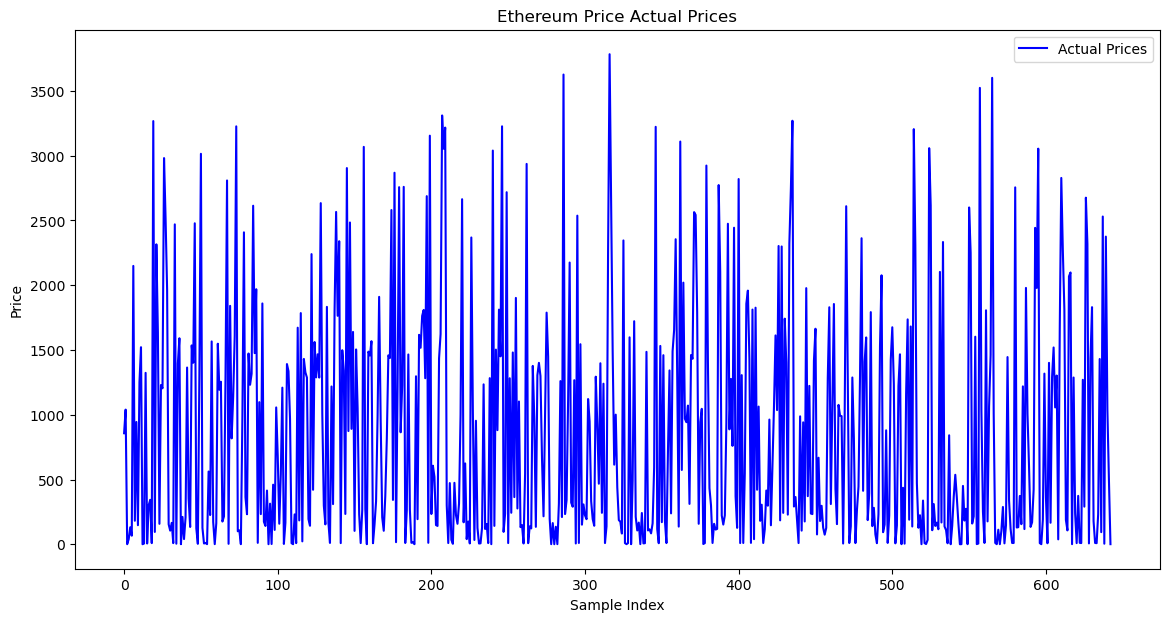

In [6]:
# Plotting
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual Prices', color='b', linestyle='-')
plt.title('Ethereum Price Actual Prices')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()

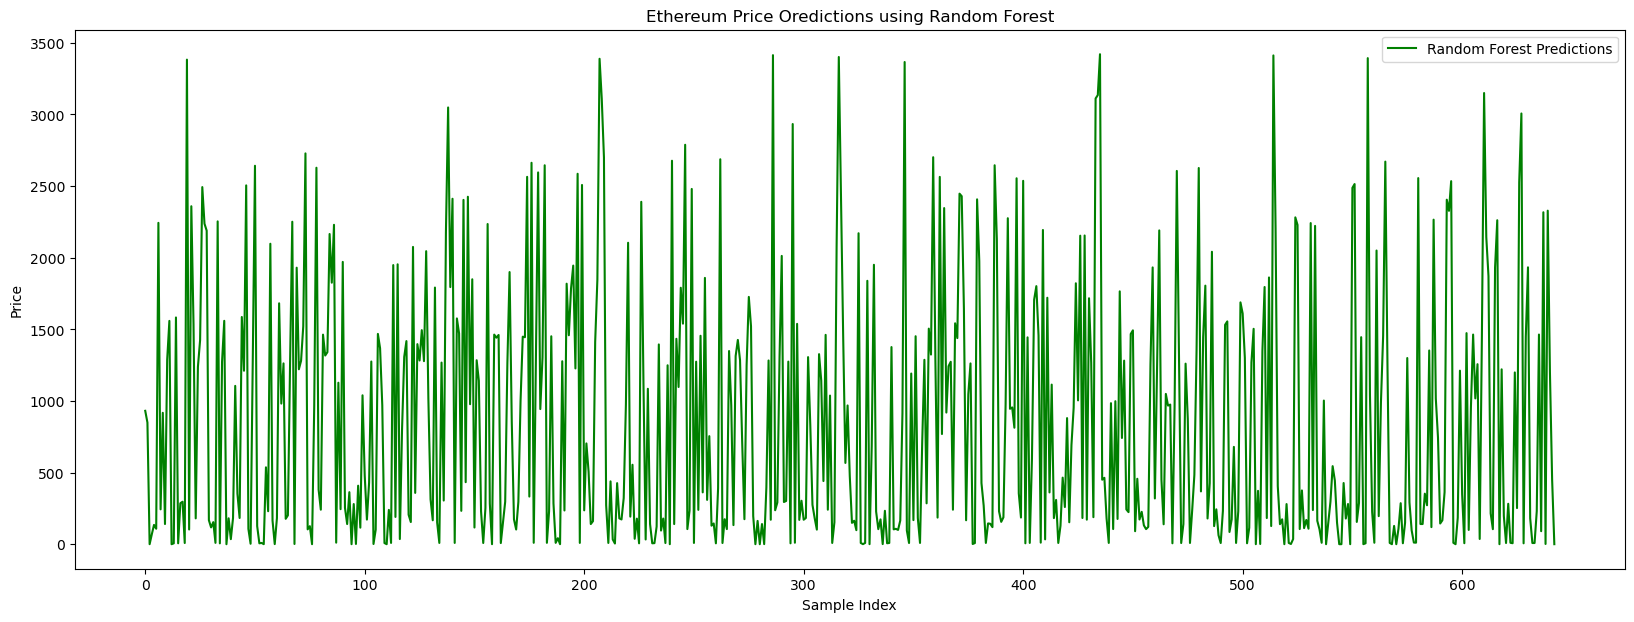

In [14]:
# Plotting
plt.figure(figsize=(20, 7))
plt.plot(y_pred_rf, label='Random Forest Predictions', color='g')
plt.title('Ethereum Price Oredictions using Random Forest')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()

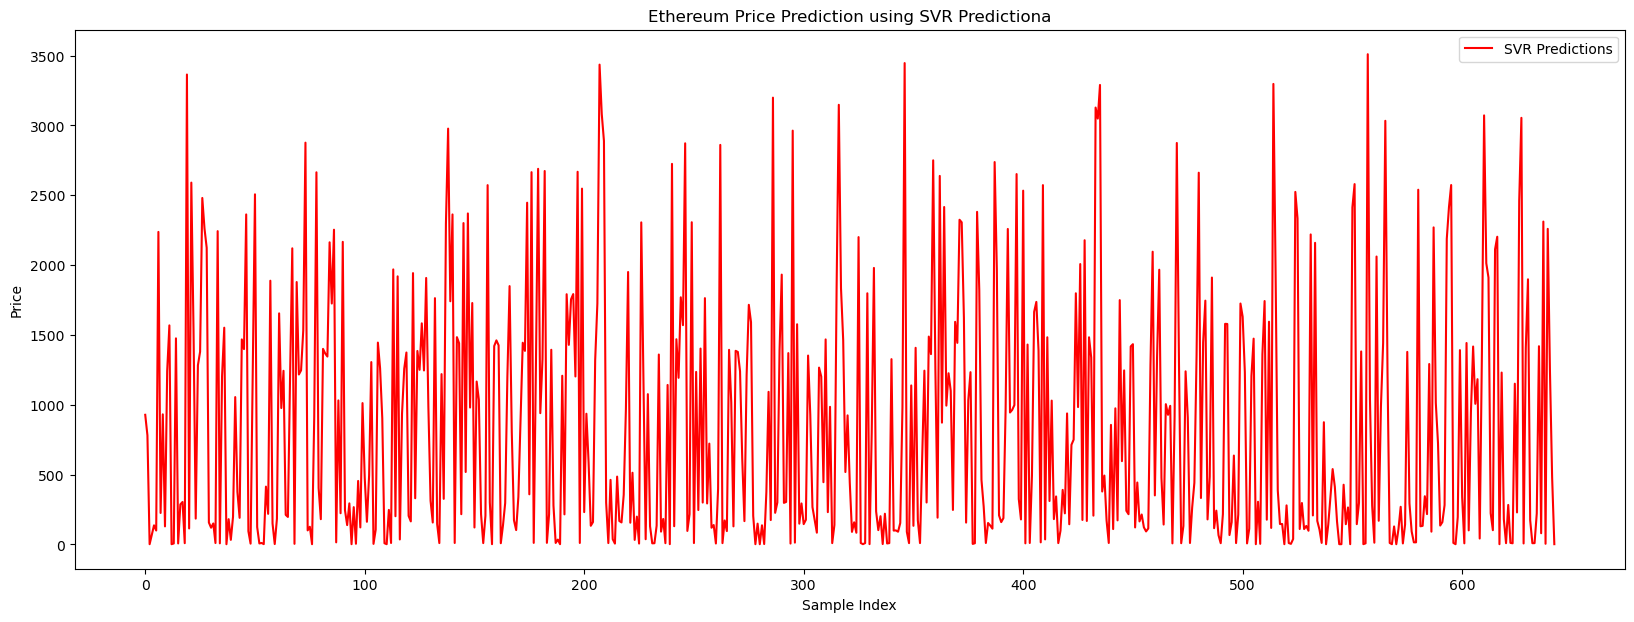

In [13]:
# Plotting
plt.figure(figsize=(20, 7))
plt.plot(y_pred_svr, label='SVR Predictions', color='r')
plt.title('Ethereum Price Prediction using SVR Predictiona')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()

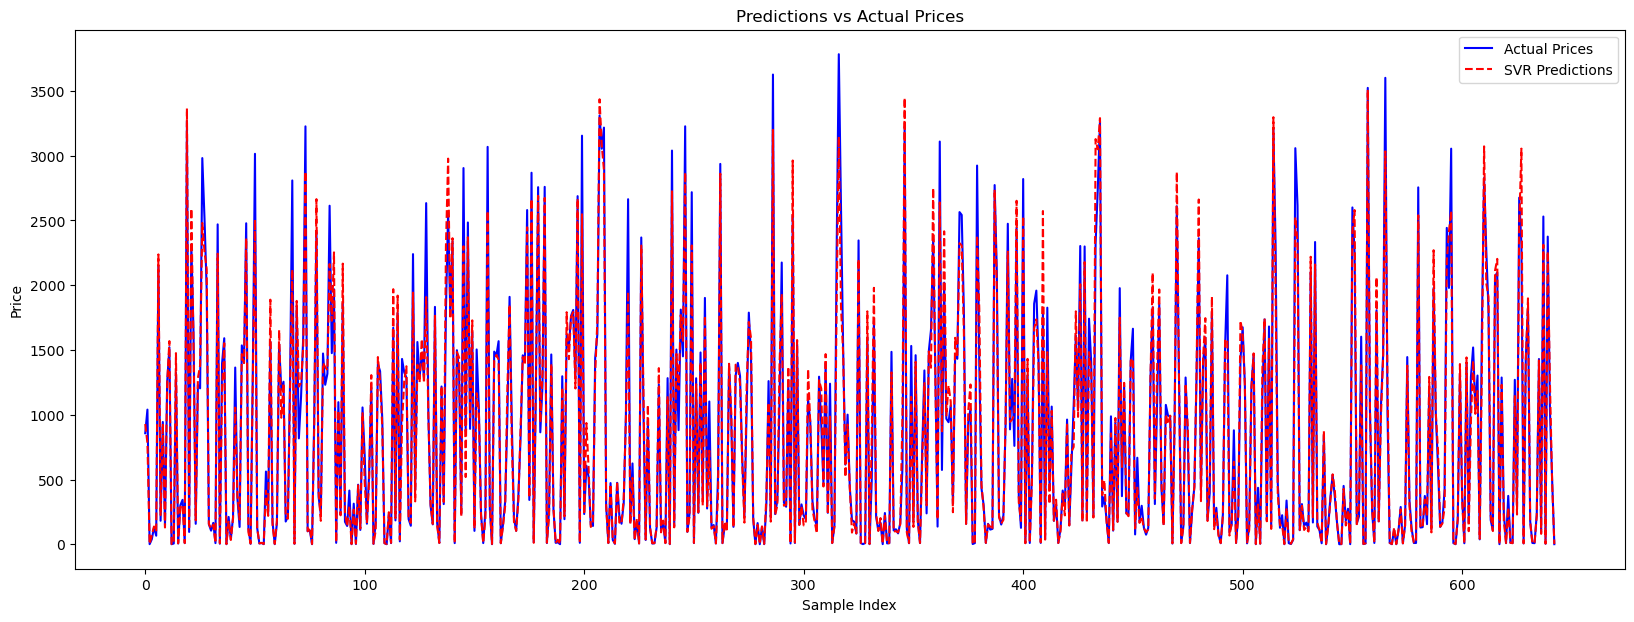

In [12]:
# Plotting
plt.figure(figsize=(20, 7))
plt.plot(y_test, label='Actual Prices', color='b', linestyle='-')
plt.plot(y_pred_svr, label='SVR Predictions', color='r', linestyle='--')
plt.title('Predictions vs Actual Prices')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()